<a href="https://colab.research.google.com/github/NairCorbalan/Data/blob/main/ProyectoFinalCorbalan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo: Construir un modelo de Machine Learning para predecir si un paciente tiene una enfermedad basándose en un conjunto de atributos clínicos. Utilizaremos un RandomForestClassifier.

Dataset: Enfermedades

Pasos:

1. Introducción y Objetivo: Definir el problema y el objetivo.
2. Importar Librerías: Cargar las herramientas necesarias.
3. Carga de Datos: Leer el dataset.
4. Hipótesis: Plantear una hipótesis clara.
5. Análisis Exploratorio de Datos (EDA): Entender los datos, distribuciones, valores faltantes y relaciones.
6. Feature Engineering (Ingeniería de Características): Crear nuevas características si es relevante.
7. Preprocesamiento de Datos: Preparar los datos para el modelo (manejo de categóricas, escalado).
8. División de Datos: Separar en conjuntos de entrenamiento y prueba.
9. Construcción y Entrenamiento del Modelo: Usar RandomForestClassifier.
10. Evaluación del Modelo: Medir el rendimiento con métricas adecuadas.
11. Análisis de Importancia de Características: Identificar qué variables son más influyentes.
12. Conclusiones: Interpretar los resultados y validar/refutar la hipótesis.

1. Introducción y Objetivo
Objetivo: El objetivo es predecir el tipo de enfermedad del paciente.

2. Importar librerias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Configuraciones para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

3. Carga de Datos

In [12]:
df = pd.read_csv('enfermedades.csv')

In [7]:
from google.colab import files
files.upload()

Saving enfermedades.csv to enfermedades (1).csv


{'enfermedades (1).csv': b'Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Diagnosis,Severity_Score,Treatment,Admission_Date,Discharge_Date,Hospital_Stay_Days,Insurance_Status,Complications,Previous_Conditions\n1,69,Hombre,Fiebre,Dolor de garganta,Dolor abdominal,Gripe,8,Antibi\xc3\xb3ticos,2024-08-29,2024-09-16,18,No cubierto,Infecci\xc3\xb3n secundaria,Asma\n2,32,Hombre,Fatiga,Escalofr\xc3\xados,Dolor abdominal,Resfriado com\xc3\xban,5,L\xc3\xadquidos,2024-05-11,2024-06-09,29,No cubierto,Infecci\xc3\xb3n secundaria,Enfermedad card\xc3\xadaca\n3,89,Mujer,Dolor de cabeza,Erupci\xc3\xb3n cut\xc3\xa1nea,Mareos,Enfermedad viral,8,Reposo,2024-12-29,2025-01-23,25,Cubierto,Ninguna,Asma\n4,78,Hombre,Fiebre,Congesti\xc3\xb3n nasal,V\xc3\xb3mitos,Gripe,9,L\xc3\xadquidos,2024-04-21,2024-04-28,7,No cubierto,Ninguna,Hipertensi\xc3\xb3n\n5,38,Hombre,Tos,Congesti\xc3\xb3n nasal,Dolor abdominal,Infecci\xc3\xb3n bacteriana,4,Analg\xc3\xa9sicos,2024-01-07,2024-01-23,16,Cubierto,Neumon\xc3\xada,Enfe

In [46]:
url = 'enfermedades.csv'
df = pd.read_csv(url)

In [47]:
df.head()

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Diagnosis,Severity_Score,Treatment,Admission_Date,Discharge_Date,Hospital_Stay_Days,Insurance_Status,Complications,Previous_Conditions
0,1,69,Hombre,Fiebre,Dolor de garganta,Dolor abdominal,Gripe,8,Antibióticos,2024-08-29,2024-09-16,18,No cubierto,Infección secundaria,Asma
1,2,32,Hombre,Fatiga,Escalofríos,Dolor abdominal,Resfriado común,5,Líquidos,2024-05-11,2024-06-09,29,No cubierto,Infección secundaria,Enfermedad cardíaca
2,3,89,Mujer,Dolor de cabeza,Erupción cutánea,Mareos,Enfermedad viral,8,Reposo,2024-12-29,2025-01-23,25,Cubierto,Ninguna,Asma
3,4,78,Hombre,Fiebre,Congestión nasal,Vómitos,Gripe,9,Líquidos,2024-04-21,2024-04-28,7,No cubierto,Ninguna,Hipertensión
4,5,38,Hombre,Tos,Congestión nasal,Dolor abdominal,Infección bacteriana,4,Analgésicos,2024-01-07,2024-01-23,16,Cubierto,Neumonía,Enfermedad cardíaca


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient_ID           1000 non-null   int64 
 1   Age                  1000 non-null   int64 
 2   Gender               1000 non-null   object
 3   Symptom_1            1000 non-null   object
 4   Symptom_2            1000 non-null   object
 5   Symptom_3            1000 non-null   object
 6   Diagnosis            1000 non-null   object
 7   Severity_Score       1000 non-null   int64 
 8   Treatment            1000 non-null   object
 9   Admission_Date       1000 non-null   object
 10  Discharge_Date       1000 non-null   object
 11  Hospital_Stay_Days   1000 non-null   int64 
 12  Insurance_Status     1000 non-null   object
 13  Complications        1000 non-null   object
 14  Previous_Conditions  1000 non-null   object
dtypes: int64(4), object(11)
memory usage: 117.3+ KB


4. Hipótesis

Hipótesis Nula (H0): Las características clínicas y demográficas disponibles (edad, sexo, condiciones previas, etc.) no son suficientes para predecir la presencia de enfermedad con una precisión significativamente mejor que el azar.

Hipótesis Alternativa (H1): Es posible construir un modelo de clasificación (Random Forest) utilizando las características clínicas y demográficas que prediga la presencia de enfermedad y AUC (Area Under Curve) significativamente superiores al 50% (azar). Esperamos alcanzar una precisión > 75%.

5. Análisis exploratorio de datos (EDA)


5.1 Revisar valores faltantes


In [49]:
missing_values = df.isnull().sum()

In [50]:
missing_values

,0
Patient_ID,0
Age,0
Gender,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Diagnosis,0
Severity_Score,0
Treatment,0
Admission_Date,0


5.2. Distribución de la variable objetivo ('diagnosis')

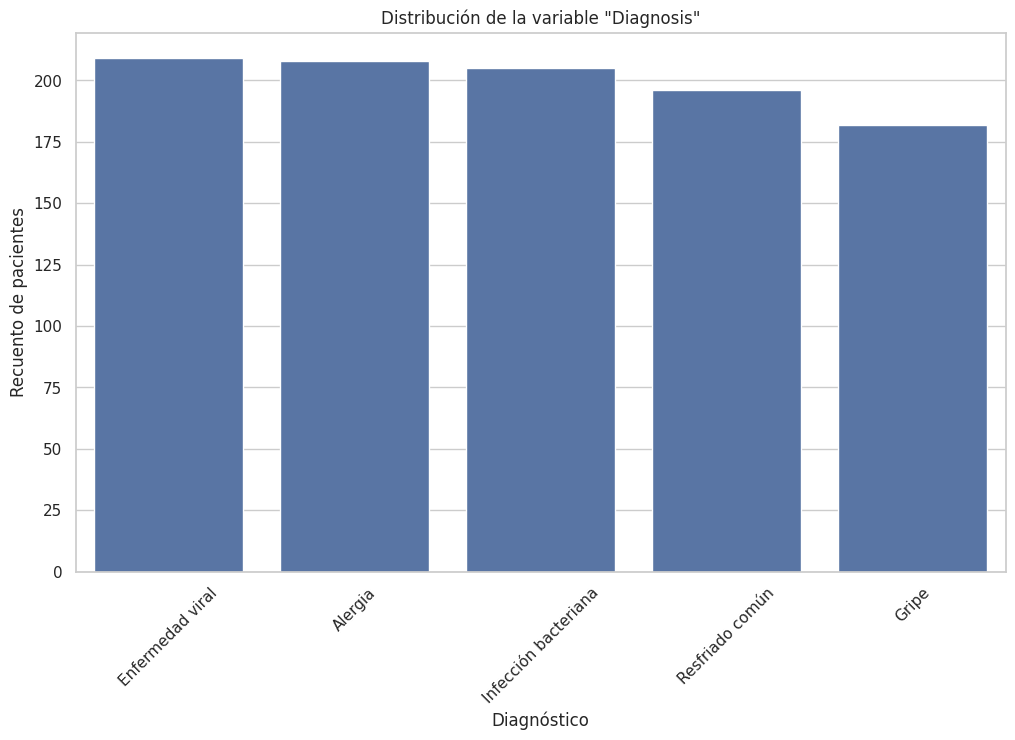

In [51]:
variable_categorica = 'Diagnosis'

plt.figure(figsize=(12, 7))
sns.countplot(data=df, x=variable_categorica, order = df[variable_categorica].value_counts().index)

plt.title(f'Distribución de la variable "{variable_categorica}"')
plt.xlabel('Diagnóstico')
plt.ylabel('Recuento de pacientes')
plt.xticks(rotation=45)
plt.show()

5.3 Análisis de las variables numéricas

In [13]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features

['Patient_ID', 'Age', 'Severity_Score', 'Hospital_Stay_Days']

In [25]:
variables_para_hist = [col for col in numerical_features if col != 'Patient_ID']

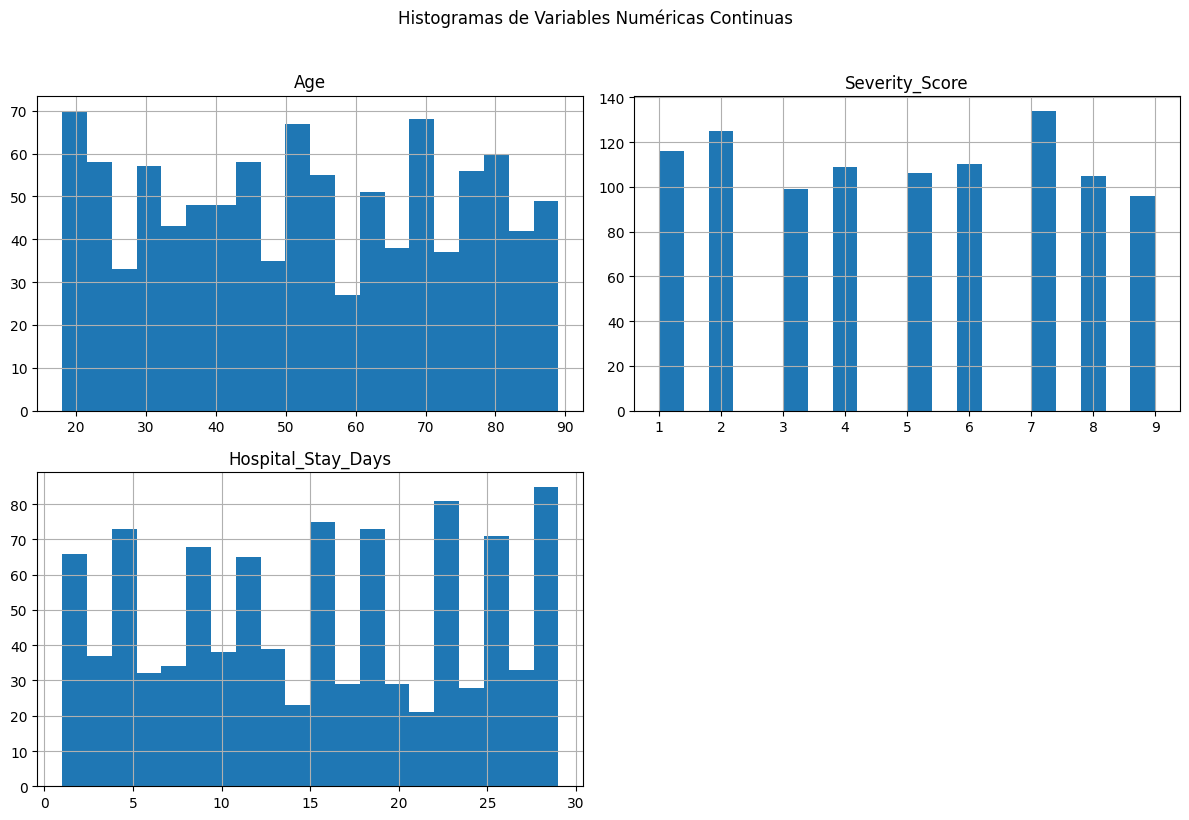

In [26]:
# Histogramas para variables continuas
df[variables_para_hist].hist(figsize=(12, 8), bins=20)
plt.suptitle('Histogramas de Variables Numéricas Continuas', y=1.02)
plt.tight_layout()
plt.show()


Boxplots de Variables Numéricas Continuas con Diagnóstico:


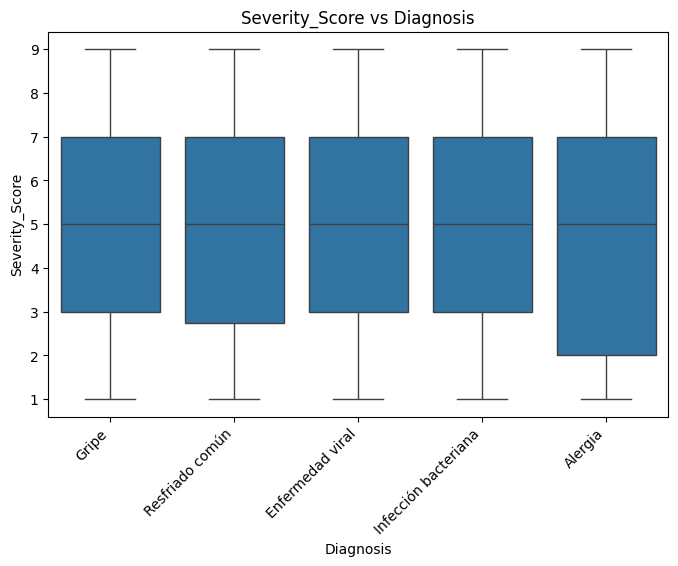

In [41]:
print("\nBoxplots de Variables Numéricas Continuas con Diagnóstico:")
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diagnosis', y='Severity_Score', data=df)
plt.title('Severity_Score vs Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Severity_Score')
plt.xticks(rotation=45, ha='right')
plt.show()

5.4 Análisis de variables categóricas

In [ ]:
categorical_features = [
'Gender',
'Symptom_1',
'Symptom_2',
'Symptom_3',
'Diagnosis',
'Treatment',
'Insurance_Status',
'Complications',
'Previous_Conditions'
]

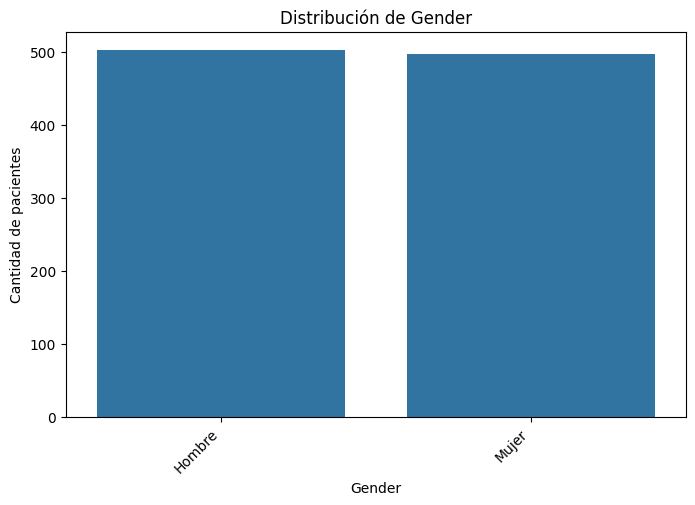

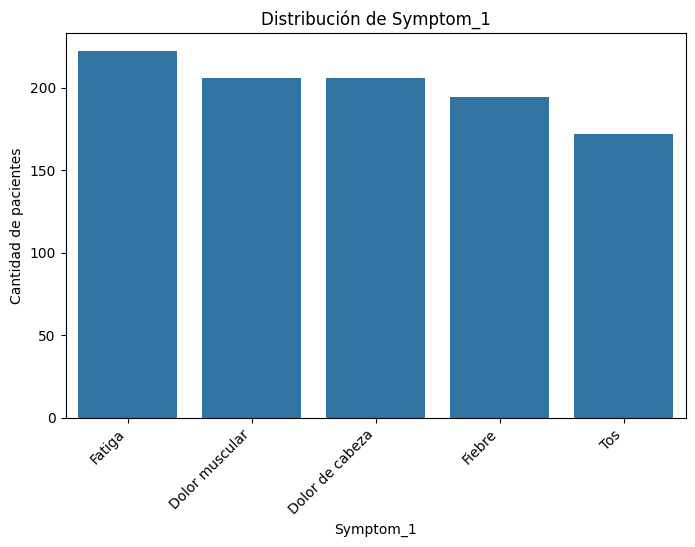

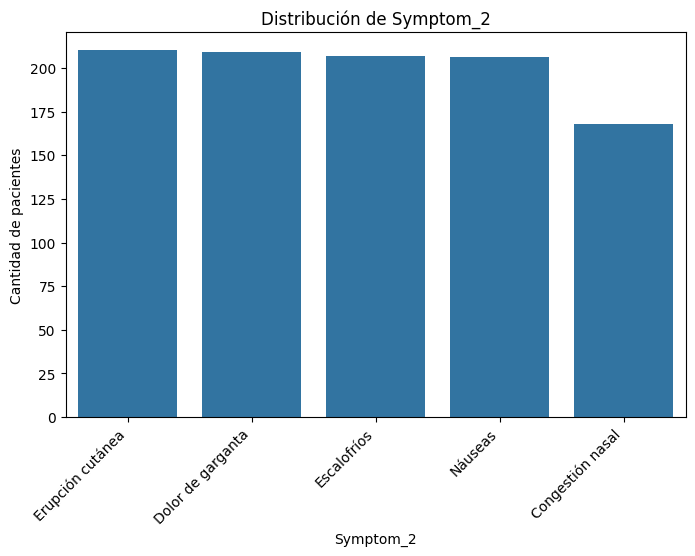

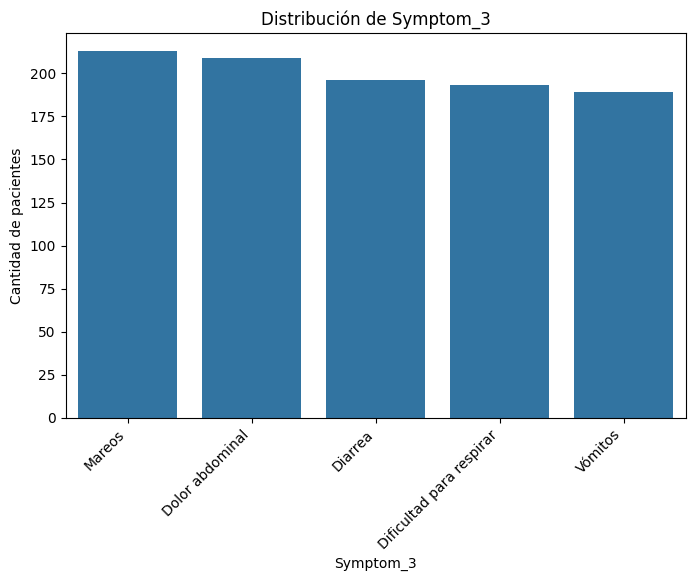

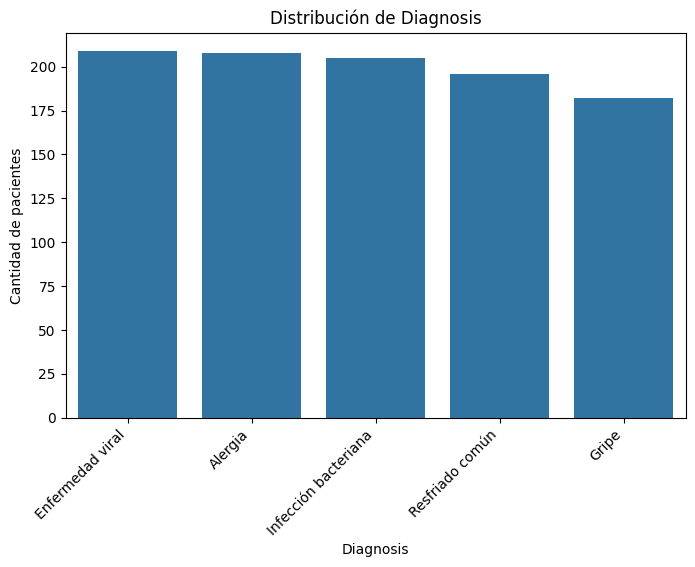

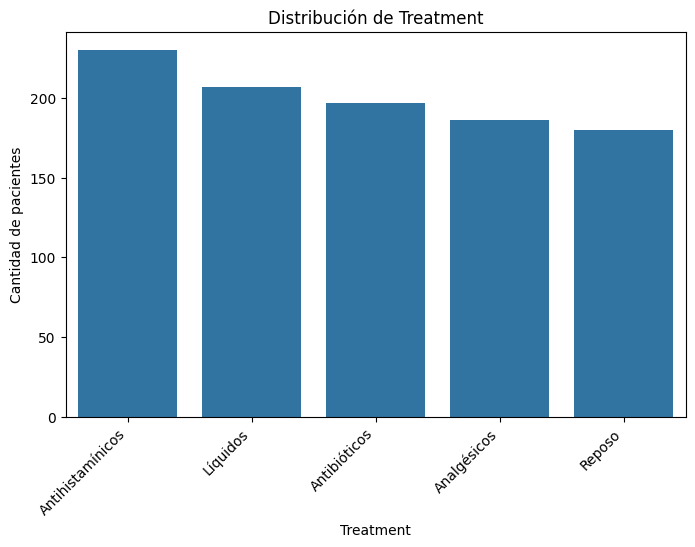

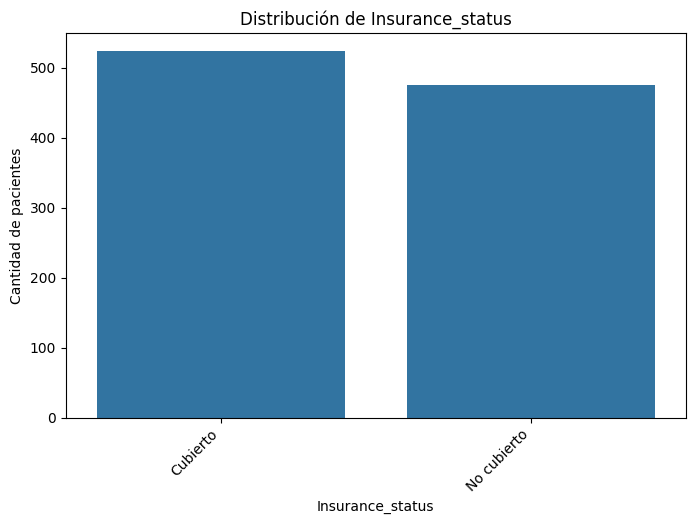

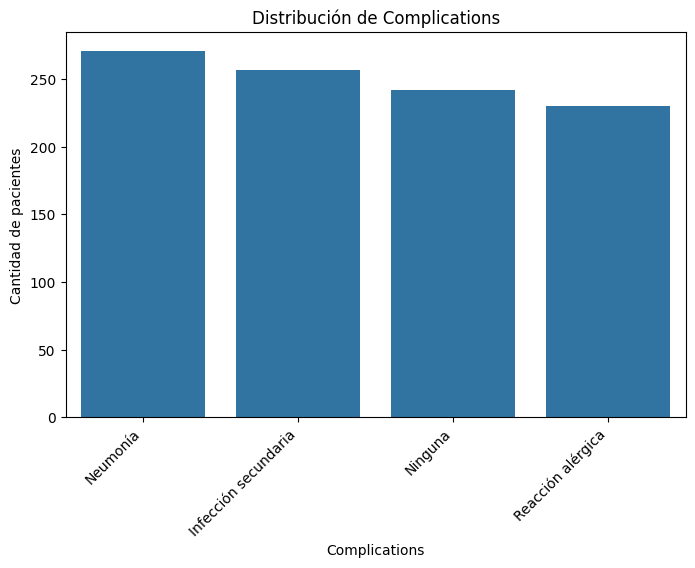

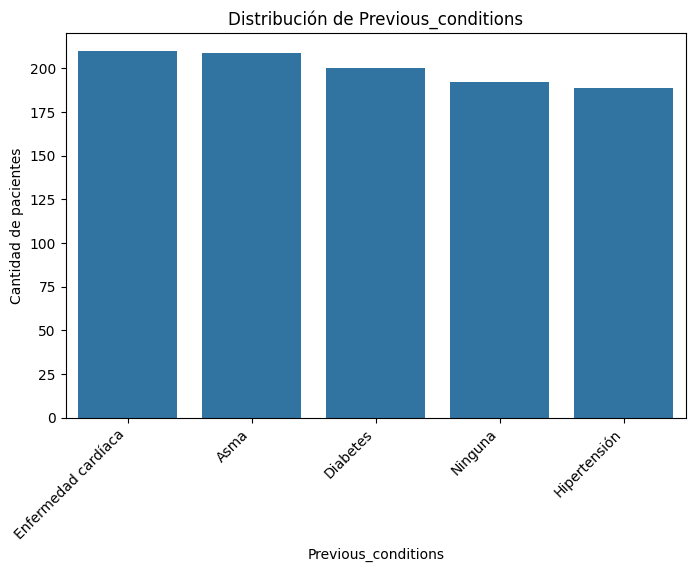

In [40]:
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Cantidad de pacientes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

6. Feature Engineering

In [46]:
#Actualizamos la lista de características categóricas a codificar
categorical_features_for_encoding = categorical_features
# Lista de características numéricas
numerical_features_for_scaling = variables_para_hist

In [47]:
features = numerical_features_for_scaling + categorical_features_for_encoding
target = 'Diagnosis'

print(f"\nCaracterísticas numéricas a escalar: {numerical_features_for_scaling}")
print(f"Características categóricas a codificar (OneHot): {categorical_features_for_encoding}")
print(f"Variable objetivo: {target}")
print("\n")


Características numéricas a escalar: ['Age', 'Severity_Score', 'Hospital_Stay_Days']
Características categóricas a codificar (OneHot): ['Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Diagnosis', 'Treatment', 'Insurance_Status', 'Complications', 'Previous_Conditions']
Variable objetivo: Diagnosis




7. Preprocesamiento de datos

In [53]:
# Definir las características (X) y la variable objetivo (y)
X = df[features]
y = df[target]

In [49]:
# Crear el preprocesador usando ColumnTransformer

# 1. OneHotEncoder para las variables categóricas
# 2. StandardScaler para las variables numéricas continuas.

preprocessor = ColumnTransformer(
transformers=[
('num', StandardScaler(), numerical_features_for_scaling),
('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_for_encoding)
],
    remainder='passthrough'
)

In [50]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Age', 'Severity_Score',
                                  'Hospital_Stay_Days']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Symptom_1', 'Symptom_2',
                                  'Symptom_3', 'Diagnosis', 'Treatment',
                                  'Insurance_Status', 'Complications',
                                  'Previous_Conditions'])])

8. División de los datos (train/test split)

In [56]:
# Usamos stratify=y para mantener la proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [57]:
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (750, 12)
Tamaño del conjunto de prueba (X_test): (250, 12)
Tamaño del conjunto de entrenamiento (y_train): (750,)
Tamaño del conjunto de prueba (y_test): (250,)


In [58]:
print("\nDistribución de la variable objetivo en Train vs Test:")
print(f"Train: \n{y_train.value_counts(normalize=True)}")
print(f"Test: \n{y_test.value_counts(normalize=True)}")


Distribución de la variable objetivo en Train vs Test:
Train: 
Diagnosis
Enfermedad viral        0.209333
Alergia                 0.208000
Infección bacteriana    0.205333
Resfriado común         0.196000
Gripe                   0.181333
Name: proportion, dtype: float64
Test: 
Diagnosis
Enfermedad viral        0.208
Alergia                 0.208
Infección bacteriana    0.204
Resfriado común         0.196
Gripe                   0.184
Name: proportion, dtype: float64


9. Construcción y entrenamiento del modelo (Random Forest)

In [59]:
# Crear el pipeline: incluye el preprocesador y el clasificador
# Esto asegura que el preprocesamiento se ajuste ("fit") SOLO en los datos de entrenamiento
# y luego se aplique ("transform") tanto a los datos de entrenamiento como a los de prueba.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
    # n_estimators: número de árboles en el bosque. 100 es un buen punto de partida.
    # random_state: para reproducibilidad.
    # class_weight='balanced': útil si las clases están desbalanceadas, ajusta pesos inversamente proporcional a la frecuencia.
])

In [60]:
# Entrenar el pipeline completo (preprocesamiento + modelo)
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Severity_Score',
                                                   'Hospital_Stay_Days']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Symptom_1',
                                                   'Symptom_2', 'Symptom_3',
                                                   'Diagnosis', 'Treatment',
                                                   'Insurance_Status',
                                                   'Complications',
                                                   'Previous_Conditions'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

10. Evaluación del modelo

In [61]:
# Realizar predicciones en el conjunto de prueba
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (1)

10.1 Accuracy

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Accuracy Score ---")
print(f"Accuracy en el conjunto de prueba: {accuracy:.2f}")

--- Accuracy Score ---
Accuracy en el conjunto de prueba: 1.00


10.2 Confusion Matrix


--- Matriz de Confusión ---


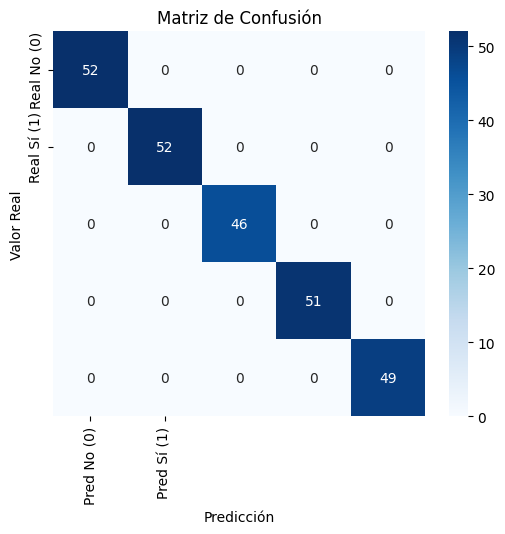

Verdaderos Negativos (TN): 52
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0
Verdaderos Positivos (TP): 52


In [64]:
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred No (0)', 'Pred Sí (1)'], yticklabels=['Real No (0)', 'Real Sí (1)'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()
print(f"Verdaderos Negativos (TN): {cm[0,0]}")
print(f"Falsos Positivos (FP): {cm[0,1]}")
print(f"Falsos Negativos (FN): {cm[1,0]}")
print(f"Verdaderos Positivos (TP): {cm[1,1]}")

10.3 Reporte de clasificación

In [65]:
reporte = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(reporte)

Reporte de Clasificación:
                      precision    recall  f1-score   support

             Alergia       1.00      1.00      1.00        52
    Enfermedad viral       1.00      1.00      1.00        52
               Gripe       1.00      1.00      1.00        46
Infección bacteriana       1.00      1.00      1.00        51
     Resfriado común       1.00      1.00      1.00        49

            accuracy                           1.00       250
           macro avg       1.00      1.00      1.00       250
        weighted avg       1.00      1.00      1.00       250



10.4 Curva ROC y AUC

No se realiza ya que ambas métricas se utilizan para problemas binarios.

11. Análisis de importancia de caracteríscticas

In [67]:
# Para obtener la importancia, necesitamos acceder al clasificador DENTRO del pipeline
rf_classifier = model_pipeline.named_steps['classifier']
importances = rf_classifier.feature_importances_

In [68]:
# Obtener el transformador OneHotEncoder del preprocesador
ohe_transformer = model_pipeline.named_steps['preprocessor'].transformers_[1][1]
# Obtener las categorías de las características codificadas
ohe_categories = ohe_transformer.categories_

In [69]:
ohe_categories

[array(['Hombre', 'Mujer'], dtype=object),
 array(['Dolor de cabeza', 'Dolor muscular', 'Fatiga', 'Fiebre', 'Tos'],
       dtype=object),
 array(['Congestión nasal', 'Dolor de garganta', 'Erupción cutánea',
        'Escalofríos', 'Náuseas'], dtype=object),
 array(['Diarrea', 'Dificultad para respirar', 'Dolor abdominal', 'Mareos',
        'Vómitos'], dtype=object),
 array(['Alergia', 'Enfermedad viral', 'Gripe', 'Infección bacteriana',
        'Resfriado común'], dtype=object),
 array(['Analgésicos', 'Antibióticos', 'Antihistamínicos', 'Líquidos',
        'Reposo'], dtype=object),
 array(['Cubierto', 'No cubierto'], dtype=object),
 array(['Infección secundaria', 'Neumonía', 'Ninguna', 'Reacción alérgica'],
       dtype=object),
 array(['Asma', 'Diabetes', 'Enfermedad cardíaca', 'Hipertensión',
        'Ninguna'], dtype=object)]

In [70]:
#nombres de las características codificadas
ohe_feature_names = []
for i, col in enumerate(categorical_features_for_encoding):
    for category in ohe_categories[i]:
        ohe_feature_names.append(f"{col}_{category}")


In [71]:
ohe_feature_names

['Gender_Hombre',
 'Gender_Mujer',
 'Symptom_1_Dolor de cabeza',
 'Symptom_1_Dolor muscular',
 'Symptom_1_Fatiga',
 'Symptom_1_Fiebre',
 'Symptom_1_Tos',
 'Symptom_2_Congestión nasal',
 'Symptom_2_Dolor de garganta',
 'Symptom_2_Erupción cutánea',
 'Symptom_2_Escalofríos',
 'Symptom_2_Náuseas',
 'Symptom_3_Diarrea',
 'Symptom_3_Dificultad para respirar',
 'Symptom_3_Dolor abdominal',
 'Symptom_3_Mareos',
 'Symptom_3_Vómitos',
 'Diagnosis_Alergia',
 'Diagnosis_Enfermedad viral',
 'Diagnosis_Gripe',
 'Diagnosis_Infección bacteriana',
 'Diagnosis_Resfriado común',
 'Treatment_Analgésicos',
 'Treatment_Antibióticos',
 'Treatment_Antihistamínicos',
 'Treatment_Líquidos',
 'Treatment_Reposo',
 'Insurance_Status_Cubierto',
 'Insurance_Status_No cubierto',
 'Complications_Infección secundaria',
 'Complications_Neumonía',
 'Complications_Ninguna',
 'Complications_Reacción alérgica',
 'Previous_Conditions_Asma',
 'Previous_Conditions_Diabetes',
 'Previous_Conditions_Enfermedad cardíaca',
 'Previ

In [72]:
final_feature_names = numerical_features_for_scaling + ohe_feature_names

Importancia de las características según Random Forest:
                            Feature  Importance
24        Diagnosis_Resfriado común    0.182059
20                Diagnosis_Alergia    0.175604
23   Diagnosis_Infección bacteriana    0.173185
22                  Diagnosis_Gripe    0.158204
21       Diagnosis_Enfermedad viral    0.154737
0                               Age    0.019029
2                Hospital_Stay_Days    0.018796
1                    Severity_Score    0.012170
17        Symptom_3_Dolor abdominal    0.003899
36         Previous_Conditions_Asma    0.003852
35  Complications_Reacción alérgica    0.003728
31     Insurance_Status_No cubierto    0.003705
5         Symptom_1_Dolor de cabeza    0.003699
33           Complications_Neumonía    0.003605
6          Symptom_1_Dolor muscular    0.003547


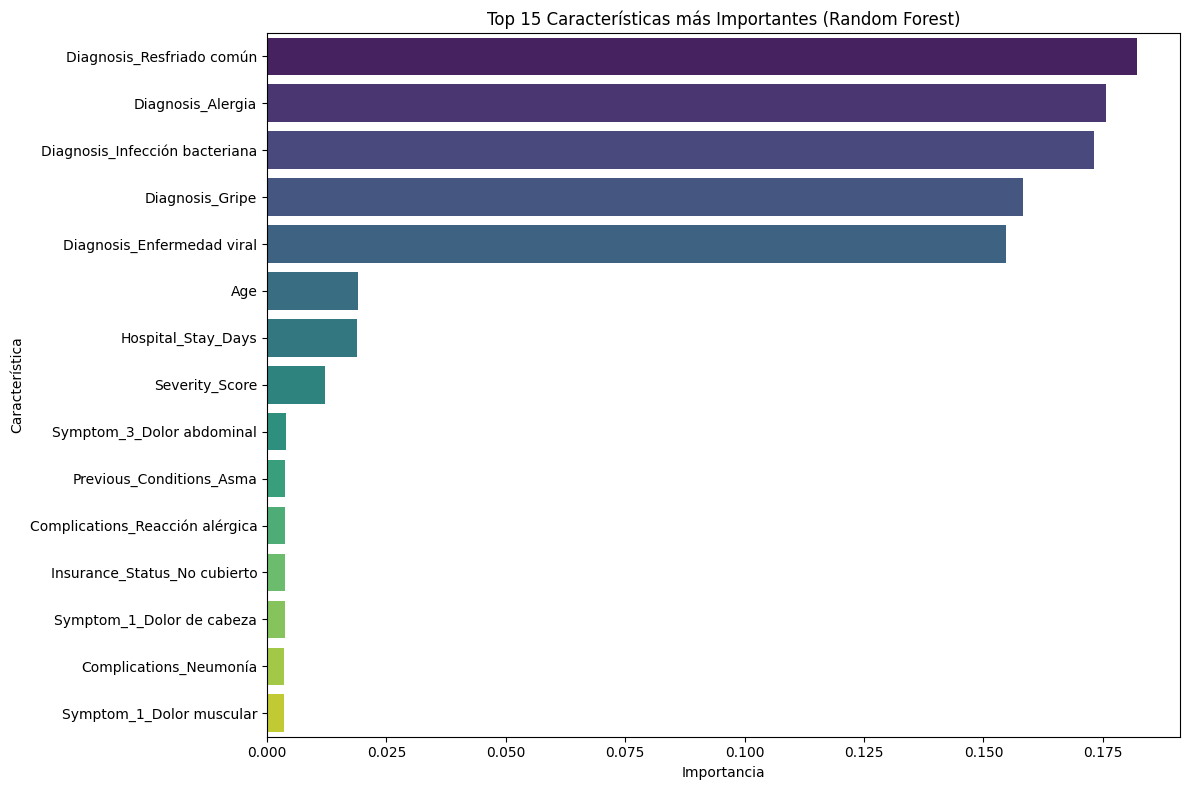

In [74]:
#DataFrame para visualizar la importancia
if len(importances) == len(final_feature_names):
    feature_importance_df = pd.DataFrame({'Feature': final_feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("Importancia de las características según Random Forest:")
    print(feature_importance_df.head(15)) # Mostrar las 15 más importantes

    # Graficar la importancia de las características
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis', hue='Feature')
    plt.title('Top 15 Características más Importantes (Random Forest)')
    plt.xlabel('Importancia')
    plt.ylabel('Característica')
    plt.tight_layout()
    plt.show()

12. Conclusiones

In [75]:
print("Resumen de Resultados:")
print(f"- Accuracy del modelo en el conjunto de prueba: {accuracy:.4f}")
print("- El reporte de clasificación muestra buena Precisión, Recall y F1-Score")

Resumen de Resultados:
- Accuracy del modelo en el conjunto de prueba: 1.0000
- El reporte de clasificación muestra buena Precisión, Recall y F1-Score para ambas clases (0 y 1).


Validación de la Hipótesis

La Hipótesis Alternativa (H1) planteaba que era posible construir un modelo de clasificación (Random Forest) utilizando las características clínicas y demográficas que prediga la presencia de enfermedad con una precisión y AUC (Area Under Curve) > 75%.

In [76]:
print(f"Obtuvimos una Accuracy de {accuracy:.2f} y AUC no pudo ser probada ya que no trabajamos con datos binarios")
if accuracy > 0.75:
    print("RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados. El modelo supera el umbral de precisión y es significativamente mejor que el azar.")
    print("Rechazamos la hipótesis nula (H0).")
else:
    print("RESULTADO: La hipótesis alternativa (H1) no es completamente soportada.")
    print("Se necesita revisar el modelo o los datos.")

Obtuvimos una Accuracy de 1.00 y AUC no pudo ser probada ya que no trabajamos con datos binarios
RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados. El modelo supera el umbral de precisión y es significativamente mejor que el azar.
Rechazamos la hipótesis nula (H0).
